<div style="background:#FFFFFF">
<img src="logo.jpg" width=150 ALIGN="left" style='margin-right:10px; border-style: solid; border-width: 2px;' alt='logo'>
<h1>Starting Kit - Bee vs Wasp </h1>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and<br>
examples. This will give you a clear idea of what this challenge is about and how you can<br>
proceed further to solve the challenge.
</p>

<br><br>
<p>
This code was tested with Python 3.8.5 |Anaconda custom (64-bit)| (default, Dec 23 2020, 21:19:02) (https://anaconda.org/)<br>
</p>
    
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    <p>
This challenge was organized by <b>Team Ecologists</b> of <b><a style='color:#4D6605;' href='http://www.chalearn.org/'>ChaLearn</a></b>  at <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>
</p>
</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

### Team Members:
####    - Phan Anh Vu
####    - Mohamed Salem Messoud

<div style="background:#FFFFFF">
<h2>Introduction </h2>


This challenge uses a Dataset from <b>MUSÉUM NATIONAL D’HISTOIRE NATURELLE</b>


The dataset coniststs of total <b>240,000</b> images and each image belongs to one of the following classes
<ol>
    <li>Bee</li>
    <li>Wasp</li>
    <li>Other insect</li>
    <li>Butterfly insect</li>  
    <li>Other</li>
</ol>
    
This challenge is about creating a Machine Learning model and train it with the data provided to classify the images into the mentioned 5 categories.


References and credits:
<ul>
    <li><a style='color:#000000;' href='https://www.mnhn.fr/'>MUSÉUM NATIONAL D’HISTOIRE NATURELLE</a></li>
    <li><a style='color:#CC0333;' href='https://www.spipoll.org/'>SPIPOLL</a></li>
    <li><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></li>
    <li><a style='color:#4D6605;' href='http://www.chalearn.org/'>ChaLearn</a></li>
</ul>
</div>

## Past experience

Convolution neural network is a proven method for image classification. \
Here, we use a typical architecture for this task. We built the model from scratch.\
We chain several convolution blocks. Each block contains a convolution kernel, then a non linear activation function and a pooling layer.\
Specifically, we choose ReLU as activation function and MaxPool as sub-sample strategy. \
Next, we flatten the activation from the last convolution block as a 1D vector. This is the final output of the convolution or feature extractor part of the network. \

After that, we add a few linear layers with non linear activation. This is the classifier part of the network.


## Future propects


### Transfer learning
Lower layers of convolution network detect simple shape, edge and corner. \
Thus, we can easily resuse the early layers of another pretrained network and adapt it for our task.\
A popular approach is to use a model pretrained on ImagetNet (MobileNet, VGG19, InceptionV3, etc). 

Having this model, we can remove the classifier part, and levarage the pretrained convolution part to extract features from our images. \
Then, we plug in a classifier tailored to our task. 

Going further, we can also finetune the higher layers of the convolution part for our data. \
We should train only the last convolution layers. \
The later layers detect high-level and specific characteristics of the training dataset. \
The earlier layers only detext basic shape and edge. \
Thus, we want to freeze the lower layers and finetune only the higher layers.

<img src="https://qjjnh3a9hpo1nukrg1fwoh71-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/1_OawILeEuxDJj-6wENKHRg-edited.jpeg">

### Data augmentation
We can perform label-preserving transformation on the original input to get a bigger dataset.\
Usually, data augmentation helps the model to generalize better. 

For image data, simple geometric and slight color disortion usually work well.\
Some examples of transformation are: brightness, contrast, flip, rotate, zoom, skew, squish

<b><a href=#Data-Augmentation>See demonstration of data augmentation</a></b>

### Increasing training data
At the moment, we are training with 10,000 images. We have the option to use \
the big training dataset that contains 200,000 images. For now, we have avoided it because \
it will increase the training time drastically (~5 hours per epoch). But maybe we can use a sample\
of 30,000 images so that the time is reasonable.

Increasing the training data always adds information and should improve the fit.

In [1]:
import os, sys, shutil
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# !pip install seaborn

In [4]:
model_dir = 'sample_code_submission/' # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
%reload_ext autoreload

***
# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

The public_data has a limited amount of examples which may not be enought to train your model. If you have a good processing resource and you need a big dataset then you can download it from : **LINK_TO_BIG_TRAIN_DATA**

The data used for this challenge has images resized into 128x128 pixels.

In [6]:
data_name = 'deep_pollination' # Do not change
# data_dir = 'sample_data' # Change it to point to the directory with public_data
data_dir = '../insect-images'
# !ls $data_dir*

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

**Install pre-requisites for image reading**

Uncomment the next line

In [ ]:
# !pip install scikit-image

In [20]:
# # scriptpath = r'/home/tp-home001/pvu3/.local/bin'
# scriptpath = r'/opt/anaconda3/lib/python3.7/site-packages'
# if scriptpath not in sys.path:
#     sys.path.append(scriptpath)

In [7]:
from data_io import read_images
data = read_images(data_dir)

------------------------------------
Reading File Names
------------------------------------

Number of images : 10000

Train Images: 10000

Validation Images: 0

Test Images: 0


------------------------------------
Reading Label Names
------------------------------------

Class Names :  ['bee' 'butterfly' 'insect' 'other' 'wasp']

------------------------------------
Reading Images
------------------------------------


Reading Train Images

Train Images Read:  10000



Data prepration successfully!


In [8]:
#Keys in the Data
for key, value in data.items():
    print("Key: "+key+" ---> Value type: ",type(value))

Key: classes ---> Value type:  <class 'numpy.ndarray'>
Key: number_of_images_per_class ---> Value type:  <class 'numpy.ndarray'>
Key: has_train ---> Value type:  <class 'bool'>
Key: X_train ---> Value type:  <class 'numpy.ndarray'>
Key: Y_train ---> Value type:  <class 'numpy.ndarray'>
Key: has_valid ---> Value type:  <class 'bool'>
Key: has_test ---> Value type:  <class 'bool'>


**Distribution of Classes/Labels**

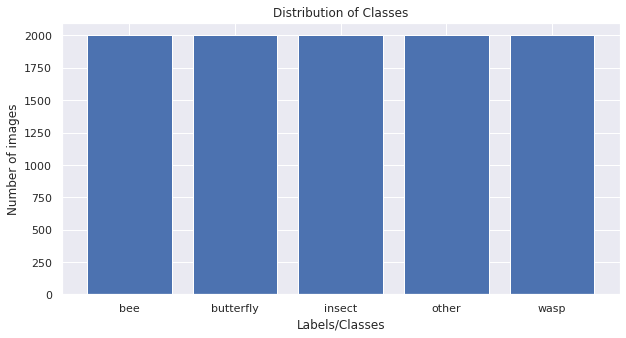

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(data['classes'], data['number_of_images_per_class'])
plt.xlabel("Labels/Classes")
plt.ylabel("Number of images")
plt.title("Distribution of Classes");

### Visualization

**Visualizing the 6 images to get an overview of the images**

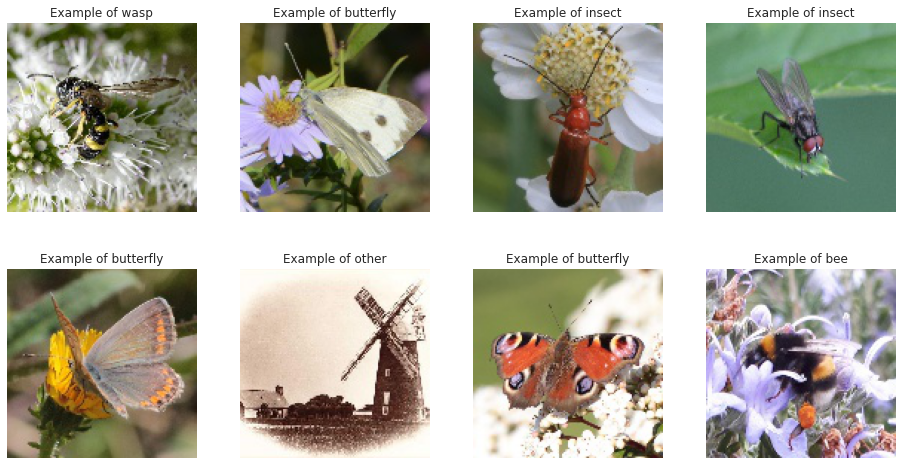

In [16]:
number_of_images_to_show = 8

index = np.random.choice(len(data["X_train"]), 8, replace=False)  
images = data["X_train"][index]
labels = data["Y_train"][index]
      

# images = data.sample(8)
fig, _axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()


for i in range(number_of_images_to_show):
    img = images[i].reshape(128,128,3)
    label = data["classes"][labels[i]]
    #img = images.iloc[[i]].drop(['target','subset'], axis=1).values.reshape(128,128,3)
    #label = images['target'].values[i]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img)
    axs[i].set_axis_off()

plt.show()

**Visulizing mean of RGB component of each class**

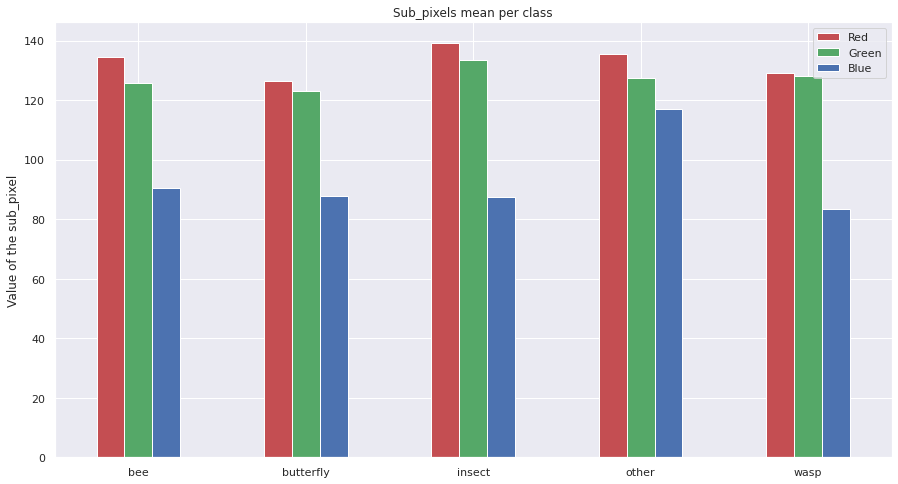

In [17]:
#Our picture have a resolution of 128x128
resolution = 128*128

#The pictures and labels
images = data["X_train"]
labels = data["Y_train"]

#Name of the classes
names = data["classes"]
#The array that will record the means :3 for the pixels and 3 to count the number of images in the class
remember_all = np.zeros((5,4))

for cpt_image, image in enumerate(images):
    #Update the number of pictures
    remember_all[labels[cpt_image]][0] += np.mean(image[0::3])
    remember_all[labels[cpt_image]][1] += np.mean(image[1::3])
    remember_all[labels[cpt_image]][2] += np.mean(image[2::3])
    remember_all[labels[cpt_image]][3]+=1

for i in range(5):
    #Do the mean for all pictures
    remember_all[i][0]/=remember_all[i][3]
    remember_all[i][1]/=remember_all[i][3]
    remember_all[i][2]/=remember_all[i][3]
        
mean_colors = pd.DataFrame(index=names, data=remember_all[:,:3], columns=["Red", "Green", "Blue"])
mean_colors.plot(kind="bar", color=['r','g','b'], title='Sub_pixels mean per class', figsize=(15,8))
plt.ylabel('Value of the sub_pixel')
plt.xticks(rotation=0)
plt.show()

# Data Augmentation

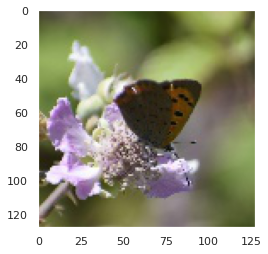

In [146]:
sample_image = data["X_train"][3].reshape(128,128,3)
plt.imshow(sample_image)
plt.grid(b=None)

We will use this example to demonstrate image transformation.

In [149]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_images(images, rows=2, columns=5, figsize=(16, 8)):
    fig, axes = plt.subplots(rows, columns, figsize=figsize)
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
def display_image(image):
    plt.imshow(image)
    plt.grid(b=None)
    plt.axis("off")

#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator/#apply_transform
def display_transform(image, transform_name, transform_min, transform_max, title=None, number=5):
    magnitudes = np.linspace(transform_min, transform_max, number)
    transformer = ImageDataGenerator()
    
    fig, axes = plt.subplots(1, number, figsize=(20, 8))
    axes = axes.flatten()

    for ax, magnitude in zip(axes, magnitudes):
        ax.imshow(transformer.apply_transform(image, {transform_name: magnitude}).astype(np.uint8))
        ax.axis('off')
        if not title: title = transform_name
        ax.set_title(f"{title}: {magnitude:.2f}")

Below, we apply a specific transform with a range of magnitude. \
We look for the widest range of magnitude, while avoiding too much distortion.

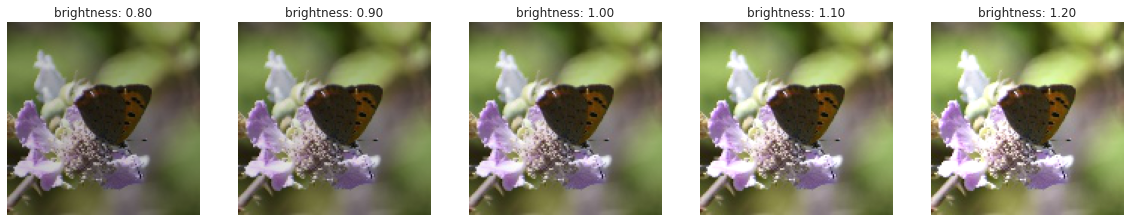

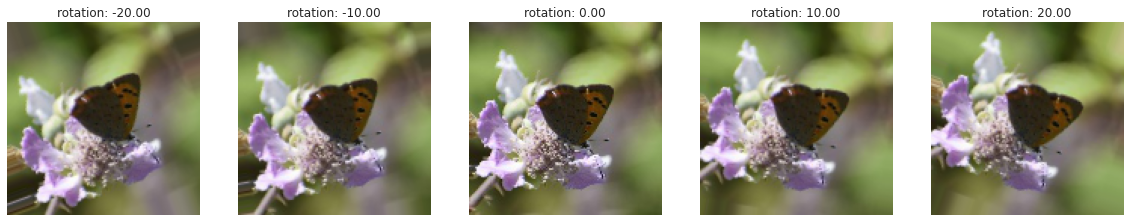

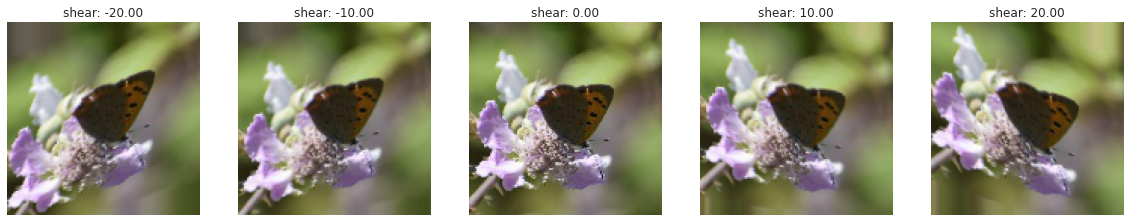

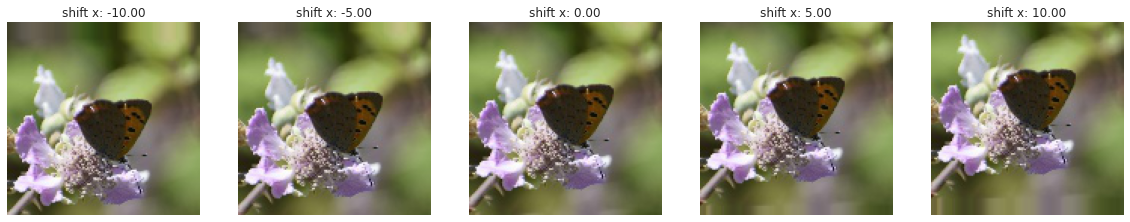

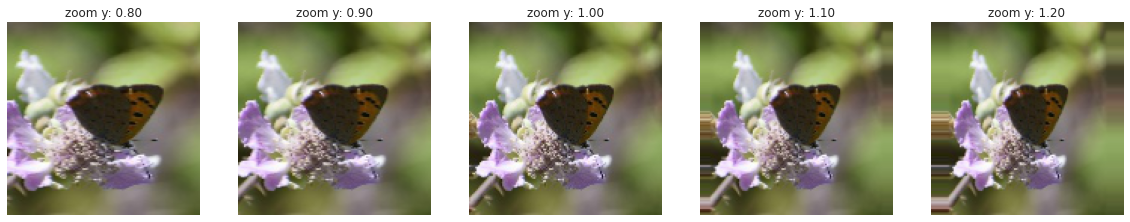

In [150]:
# display_image(transform.apply_transform(sample_image, {'brightness': 0.8}).astype(np.uint8))
display_transform(sample_image, 'brightness', 0.8, 1.2)
display_transform(sample_image, 'theta', -20, 20, 'rotation')
display_transform(sample_image, 'shear', -20, 20)
display_transform(sample_image, 'tx', -10, 10, 'shift x')
display_transform(sample_image, 'zy', 0.8, 1.2, 'zoom y')

Now, we try to compose multiple transformations at the same time. \
The magnitude will be chosen randomly from the specified range. 

In [160]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator/#arguments
transformer = ImageDataGenerator(
    brightness_range = (0.8, 1.2),
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="reflect")

transformed_sample = transformer.flow(sample_image[None, ...], batch_size=1)
transformed_image = map(lambda sample: sample[0].astype(np.uint8), transformed_sample)
# next(transformed_image)

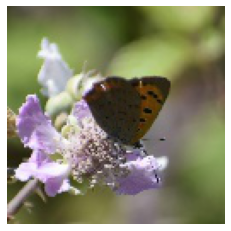

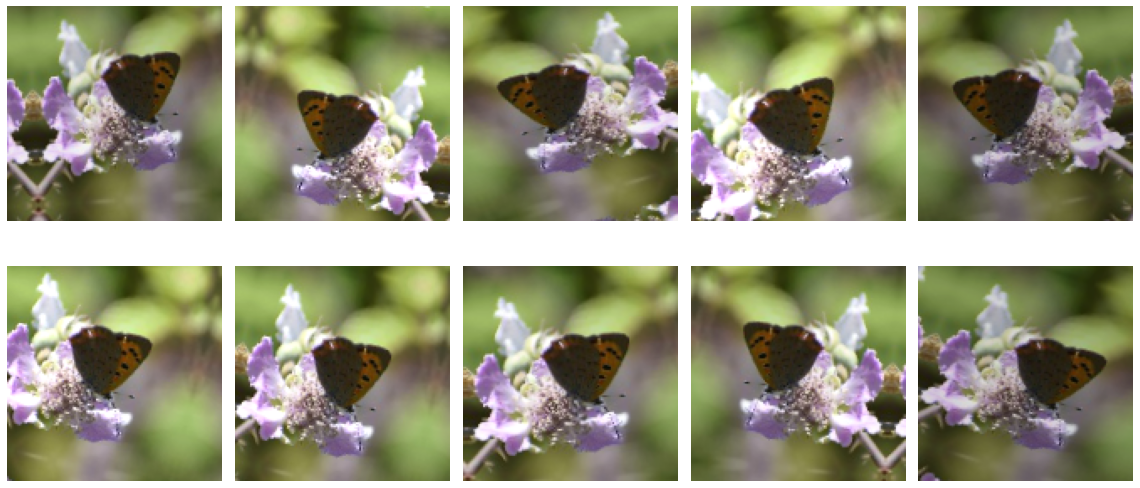

In [161]:
    
display_image(sample_image)
plot_images(transformed_image, rows=2, columns=5)

***
# Step 2: Building a predictive model
We reload the data with the AutoML DataManager class because this is more convenient:

## Training a predictive model
We provide an example of predictive model in the `sample_code_submission/` directory. 
You can change this model and use a better one to get a good score for the challenge


**Install pre-requisites for using the model from Keras**

Uncomment the next line

In [ ]:
# !pip install --user --upgrade tensorflow
# !pip install keras

In [9]:
%autoreload 2
from data_io import write
from model import model

Using TensorFlow backend.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# model.py init
def get_model():
    num_train_samples=0
    num_feat=1
    num_labels=1
    is_trained=False
    input_shape=(128,128,3)
        
    model_cnn = Sequential()
    model_cnn.add(Conv2D(16, 3, activation='relu', input_shape=input_shape))
    model_cnn.add(MaxPooling2D(2))

    model_cnn.add(Conv2D(32, 3, activation='relu'))
    model_cnn.add(MaxPooling2D(2))

    model_cnn.add(Conv2D(64, 3, activation='relu'))
    model_cnn.add(MaxPooling2D(2))

    model_cnn.add(Flatten())

    model_cnn.add(Dense(512, kernel_initializer='uniform', activation='relu'))
    model_cnn.add(Dense(5, kernel_initializer='uniform', activation='sigmoid'))
    model_cnn.compile(loss='categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])
    return model_cnn

<div style="background:#FFF">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
</div>

In [37]:
myModel = get_model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#myModel = myModel.load(trained_model_name) 

In [45]:
from tensorflow.keras.utils import to_categorical
# model.py fit
def fit(model_cnn, x, y):
    categorical_labels = to_categorical(y, num_classes=5)
    x = x.reshape(len(x), 128, 128, 3)
    #         class_weight = {0: 0.13,
    #                         1: 1.}
#     print(x.shape)
    model_cnn.fit(x/255., categorical_labels, epochs=5, validation_split=0.2,batch_size=100)
    return model_cnn

<div style="background:#FFF">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [44]:
myModel = fit(myModel, data["X_train"], data["Y_train"])                     


Epoch 1/10
80/80 [==============================] - 34s 417ms/step - loss: 1.3386 - accuracy: 0.4490 - val_loss: 1.3921 - val_accuracy: 0.4225
Epoch 2/10
80/80 [==============================] - 33s 407ms/step - loss: 1.1581 - accuracy: 0.5336 - val_loss: 1.2297 - val_accuracy: 0.4800
Epoch 3/10
80/80 [==============================] - 33s 408ms/step - loss: 1.0426 - accuracy: 0.5835 - val_loss: 1.0941 - val_accuracy: 0.5445
Epoch 4/10
80/80 [==============================] - 33s 408ms/step - loss: 0.9026 - accuracy: 0.6503 - val_loss: 1.0679 - val_accuracy: 0.5865
Epoch 5/10
80/80 [==============================] - 33s 408ms/step - loss: 0.7551 - accuracy: 0.7117 - val_loss: 1.1777 - val_accuracy: 0.5375
Epoch 6/10
80/80 [==============================] - 34s 428ms/step - loss: 0.5425 - accuracy: 0.8015 - val_loss: 1.1681 - val_accuracy: 0.5790
Epoch 7/10
80/80 [==============================] - 33s 412ms/step - loss: 0.3790 - accuracy: 0.8649 - val_loss: 1.2301 - val_accuracy: 0.5790

In [53]:
# model.py predict
def predict(model_cnn, X):
    X = X.reshape(len(X),128,128,3)
    y = model_cnn.predict(X/255.)
#     print("PREDICT: Prediction done")

    return np.argmax(y, axis=1)

In [54]:
# if not(myModel.is_trained):

Y_hat_train = predict(myModel, data["X_train"]) # Optional, not really needed to test on taining examples

if data["has_valid"]:
    Y_hat_valid = predict(myModel, data["X_valid"])

if data["has_test"]:
    Y_hat_test = predict(myModel, data["X_test"])

In [56]:
# model.py save
def save(model_cnn, path="./"):
    model_name = path+'_model.h5'
    model_cnn.save(model_name)
    print("Model Saved : " + model_name)
    #pickle.dump(self.model_cnn, open(path + '_model.pickle', "wb"))

**Save the trained model** (will be ready to reload next time around) and save the prediction results. <br>

In [57]:
myModel.save(trained_model_name)    

INFO:tensorflow:Assets written to: sample_code_submission/deep_pollination/assets


**IMPORTANT:** if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.

**REQUIRED:** Trained model is required in the submission to codalab. 

In [58]:
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)

if data["has_valid"]:
    write(result_name + '_valid.predict', Y_hat_valid)

if data["has_test"]:
    write(result_name + '_test.predict', Y_hat_test)

!ls $result_name*

sample_result_submission/deep_pollination_test.predict
sample_result_submission/deep_pollination_train.predict
sample_result_submission/deep_pollination_valid.predict


## Scoring the results
### Load the challenge metric

**The metric chosen for your challenge** is identified in the "metric.txt" file found in the `scoring_program/` directory.
<br> 
The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.


In [59]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: accuracy


## Training performance

In [60]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_train"], Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_train"], data["Y_train"]))

if data["has_valid"]:
    print('Validation score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_valid"], Y_hat_valid))
if data["has_test"]:
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_test"], Y_hat_test))

Training score for the accuracy metric = 0.9130
Ideal score for the accuracy metric = 1.0000


You can add here other scores and result visualization.

## Confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(data["Y_train"], Y_hat_train)

In [62]:
confusion_matrix

array([[1736,   50,  110,   22,   82],
       [  49, 1851,   42,   28,   30],
       [  93,   56, 1745,   14,   92],
       [  16,   27,   20, 1926,   11],
       [  36,   17,   64,   11, 1872]])

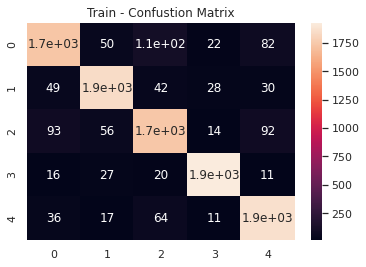

In [63]:
df_cm = pd.DataFrame(confusion_matrix, range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1]))
sns.heatmap(df_cm, annot=True)
plt.title("Train - Confustion Matrix")
plt.show()

## Cross-validation performance

CV scores on sample_data doesn't have enough data, and so isn't meaningful.
Run it with the full data to see meaningful values.

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(myModel, data["X_train"], data["Y_train"], cv=3, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

***
# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

In [65]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Could not find conda environment: python3
You can list all discoverable environments with `conda info --envs`.

Using input_dir: /home/tp-home001/pvu3/Documents/projectb/insect-images
Using output_dir: /home/tp-home001/pvu3/Documents/projectb/starting_kit_image/sample_result_submission
Using program_dir: /home/tp-home001/pvu3/Documents/projectb/starting_kit_image/ingestion_program
Using submission_dir: /home/tp-home001/pvu3/Documents/projectb/starting_kit_image/sample_code_submission
Data name: deep_pollination
2021-04-02 16:59:49.664388: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/pragmadev/pragmastudio/bin
2021-04-02 16:59:49.664426: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using TensorFlow backend.

========== Ingesti

### Test scoring program

In [66]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

Could not find conda environment: python3
You can list all discoverable environments with `conda info --envs`.

------------------------------------
Reading Solutions
------------------------------------

Number of solutions : 10000

Train solutions: 10000

Validation solutions: 0

Test solutions: 0


Solutions files are ready!
======= Set 1 (Deep_pollination_train): accuracy(set1_score)=0.913000000000 =======


In [67]:
!pwd

/home/tp-home001/pvu3/Documents/projectb/starting_kit_image


# Prepare the submission

In [25]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './sample_code_submission_' + the_date + '.zip'
sample_result_submission = './sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_21-03-02-19-48.zip
../sample_result_submission_21-03-02-19-48.zip
